<a href="https://colab.research.google.com/github/harsha-9977/AIML/blob/main/01_07_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8883 - loss: 0.3618 - val_accuracy: 0.9857 - val_loss: 0.0540
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0531 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9918 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0342
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9907 - val_loss: 0.0356
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0361

Test Accuracy: 0.9900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


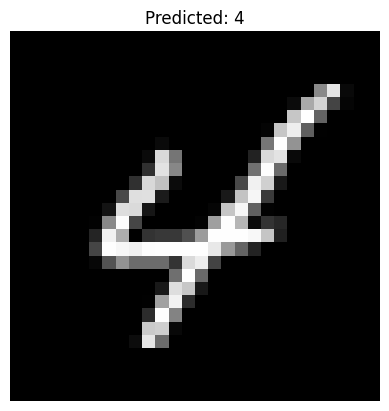

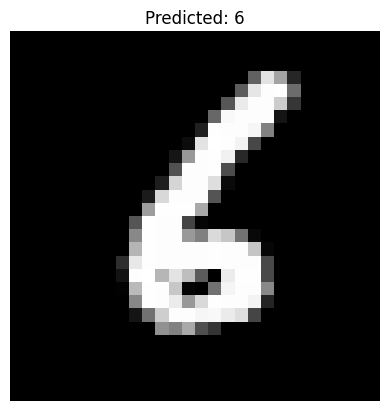

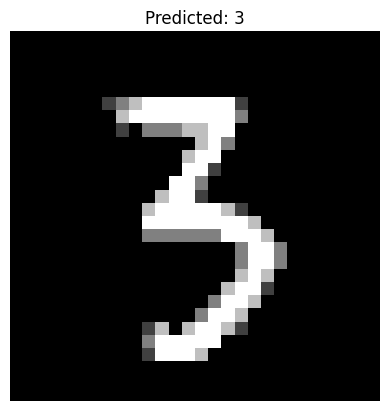

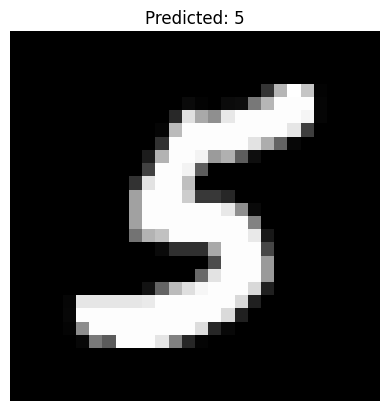

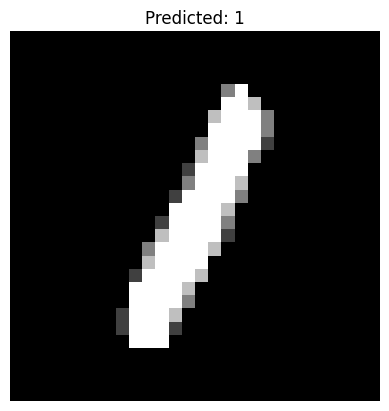

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (28x28x1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Predict and visualize 5 random images
import numpy as np
import random

indices = random.sample(range(len(x_test)), 5)
sample_images = x_test[indices]
predictions = model.predict(sample_images)

for i, img in enumerate(sample_images):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()
